In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.spatial.distance import jensenshannon
import geopandas as gpd

from PopSynthesis.Methods.IPSF.const import data_dir, output_dir
from PopSynthesis.Methods.connect_HH_PP.scripts.utils import convert_full_to_marg_count

In [3]:
font = {'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)

geo_lev = "POA"

In [6]:
syn_hh_ipu = pd.read_csv(r"C:\Users\dlaa0001\Documents\PhD\PopSyn_Monash\PopSynthesis\Methods\IPU\output\syn_hh_ipu.csv")
syn_hh_saa = pd.read_csv(r"C:\Users\dlaa0001\Documents\PhD\PopSyn_Monash\PopSynthesis\Methods\IPSF\output\SAA_HH_fixed_ad.csv")

C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_1456\3345895256.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  syn_hh_saa = pd.read_csv(r"C:\Users\dlaa0001\Documents\PhD\PopSyn_Monash\PopSynthesis\Methods\IPSF\output\SAA_HH_fixed_ad.csv")


In [7]:
syn_hh_ipu = syn_hh_ipu.astype(str)
syn_hh_saa = syn_hh_saa.astype(str)

In [8]:
marg_hh = pd.read_csv(os.path.join(data_dir,f"hh_marginals_ipu.csv"), header=[0,1])

In [9]:
marg_hh

zone_id        sample_geog hhsize                               \
    Unnamed: 0_level_1 Unnamed: 1_level_1      1     2     3    4    5   6  7   
0                 3000                  2  10393  8524  2026  656  118  27  4   
1                 3002                  2   1035  1019   190  101   38   9  0   
2                 3003                  2   1504  1591   476  223   40  11  7   
3                 3004                  2   2566  2382   511  227   33   6  5   
4                 3006                  2   5113  5033  1280  414   59  13  8   
..                 ...                ...    ...   ...   ...  ...  ...  .. ..   
686               3990                  2      6    20     8    4    3   0  0   
687               3991                  2     37    65    16   19   10   9  0   
688               3992                  2    134   201    72   60   24   9  0   
689               3995                  2   1663  1834   629  451  228  73  8   
690               3996                  2    806  1176   251  299  137  31  6   

         ...      hhinc totalvehs                              owndwell  \
     8+  ... Nil income         0     1     2    3   4+ Being Purchased   
0    58  ...       1906     14682  5463   846  412  403            2446   
1    55  ...         42       468  1267   553   91   68             436   
2    55  ...        158      1391  1942   422   95   57             797   
3    55  ...        172      1228  3429   872  162   94            1206   
4    58  ...        431      4720  5867  1037  200  154            2139   
..   ..  ...        ...       ...   ...   ...  ...  ...             ...   
686  55  ...          5         8    13    22   25   28              16   
687  55  ...          9        24    51    62   44   30              51   
688  55  ...          8        12   153   218   93   79             229   
689  58  ...         87       379  1955  1685  584  341            1326   
690  59  ...         54        91  1060  1178  299  137             691   

                                             
    Being Rented Fully Owned Something Else  
0          16601        2291            468  
1           1292         677             42  
2           2548         463             99  
3           3214        1268             97  
4           8093        1533            213  
..           ...         ...            ...  
686            0          22             58  
687           17          67             76  
688           55         192             79  
689         1150        2316            152  
690          494        1523             57  

[691 rows x 46 columns]

In [10]:
hold = marg_hh.columns[marg_hh.columns.get_level_values(0)=="zone_id"]
marg_hh = marg_hh.set_index(hold[0])
marg_hh.index.name = geo_lev
marg_hh = marg_hh.drop(columns=list(marg_hh.columns[marg_hh.columns.get_level_values(0).isin(["sample_geog", "zone_id"])]))
marg_hh

hhsize                                          dwelltype          ...  \
          1     2     3    4    5   6  7  8+ Flat or Apartment Missing  ...   
POA                                                                     ...   
3000  10393  8524  2026  656  118  27  4  58             21548     133  ...   
3002   1035  1019   190  101   38   9  0  55              1888      10  ...   
3003   1504  1591   476  223   40  11  7  55              3163       2  ...   
3004   2566  2382   511  227   33   6  5  55              5739      30  ...   
3006   5113  5033  1280  414   59  13  8  58             11783      34  ...   
...     ...   ...   ...  ...  ...  .. ..  ..               ...     ...  ...   
3990      6    20     8    4    3   0  0  55                 0       0  ...   
3991     37    65    16   19   10   9  0  55                 0       0  ...   
3992    134   201    72   60   24   9  0  55                 0       0  ...   
3995   1663  1834   629  451  228  73  8  58                27       6  ...   
3996    806  1176   251  299  137  31  6  59                17       4  ...   

          hhinc totalvehs                              owndwell               \
     Nil income         0     1     2    3   4+ Being Purchased Being Rented   
POA                                                                            
3000       1906     14682  5463   846  412  403            2446        16601   
3002         42       468  1267   553   91   68             436         1292   
3003        158      1391  1942   422   95   57             797         2548   
3004        172      1228  3429   872  162   94            1206         3214   
3006        431      4720  5867  1037  200  154            2139         8093   
...         ...       ...   ...   ...  ...  ...             ...          ...   
3990          5         8    13    22   25   28              16            0   
3991          9        24    51    62   44   30              51           17   
3992          8        12   153   218   93   79             229           55   
3995         87       379  1955  1685  584  341            1326         1150   
3996         54        91  1060  1178  299  137             691          494   

                                 
     Fully Owned Something Else  
POA                              
3000        2291            468  
3002         677             42  
3003         463             99  
3004        1268             97  
3006        1533            213  
...          ...            ...  
3990          22             58  
3991          67             76  
3992         192             79  
3995        2316            152  
3996        1523             57  

[691 rows x 44 columns]

In [11]:
# Polynomial Regression
def r_squared(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

In [16]:
syn_hh_saa = syn_hh_saa.rename(columns={"zone_id":geo_lev})
syn_hh_ipu = syn_hh_ipu.rename(columns={"geog":geo_lev})

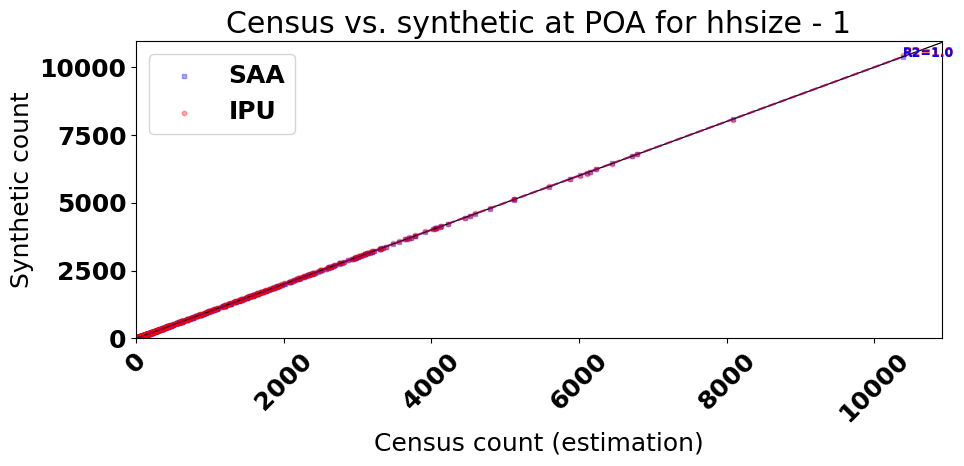

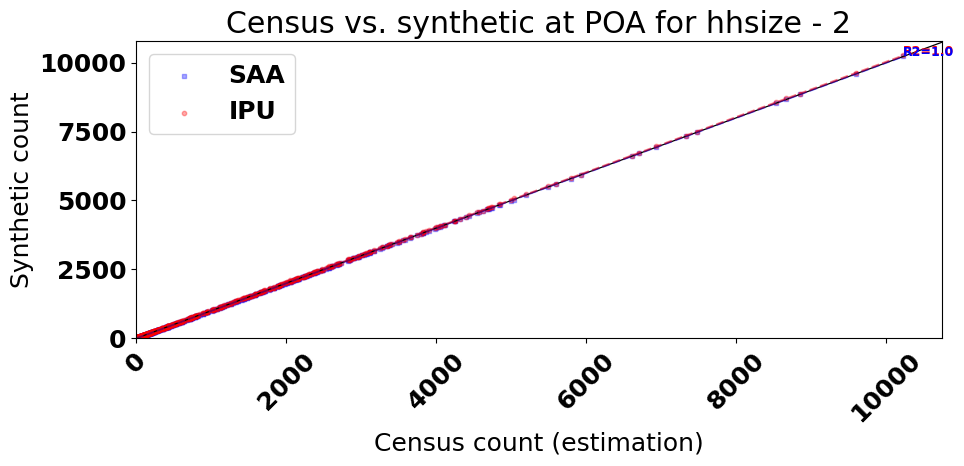

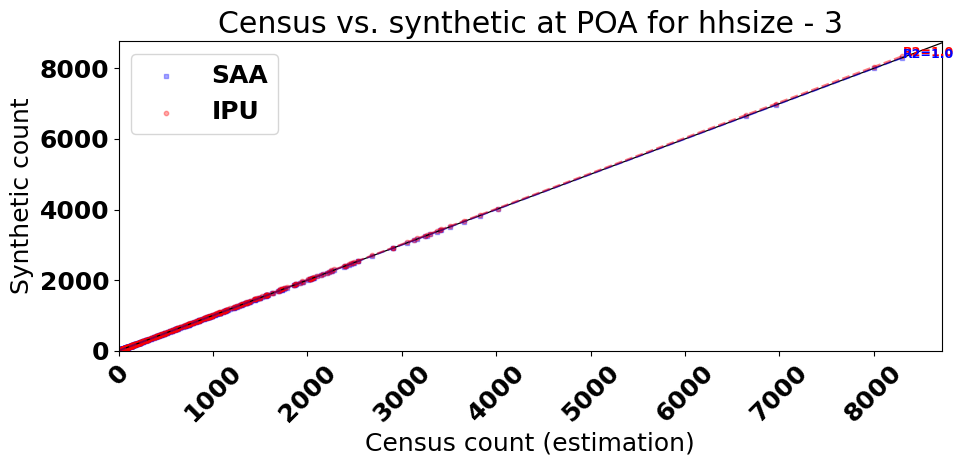

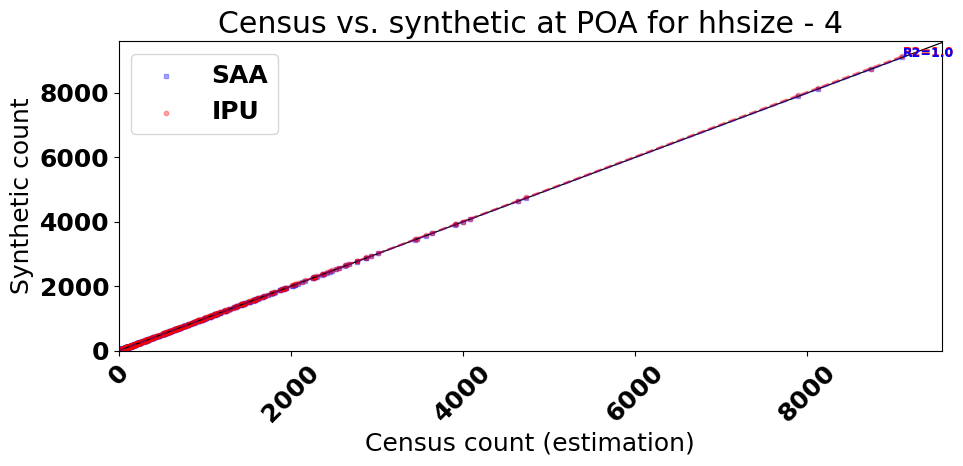

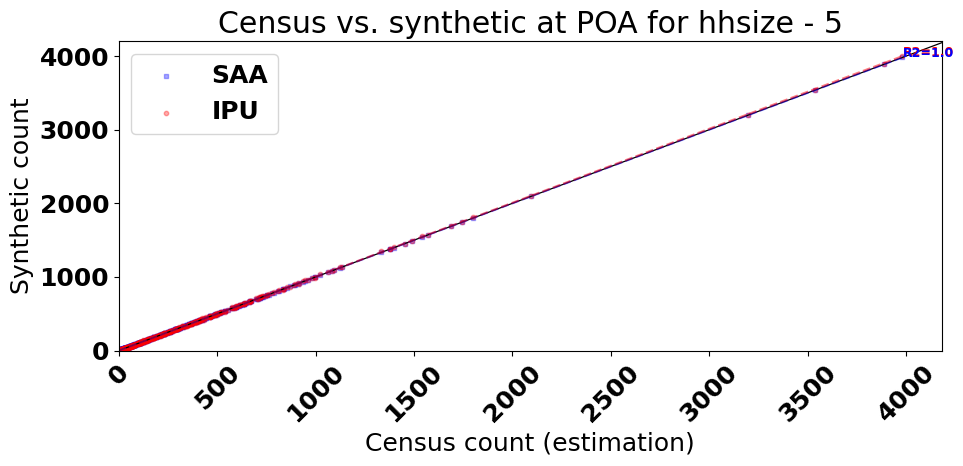

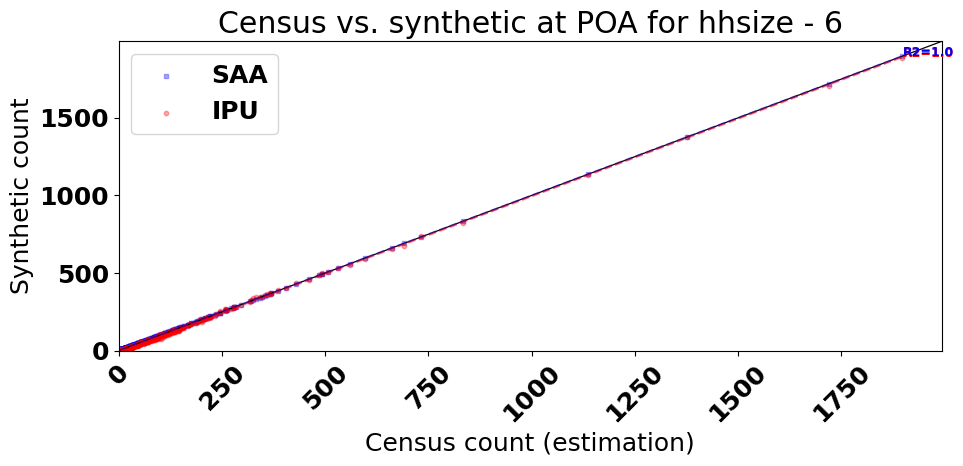

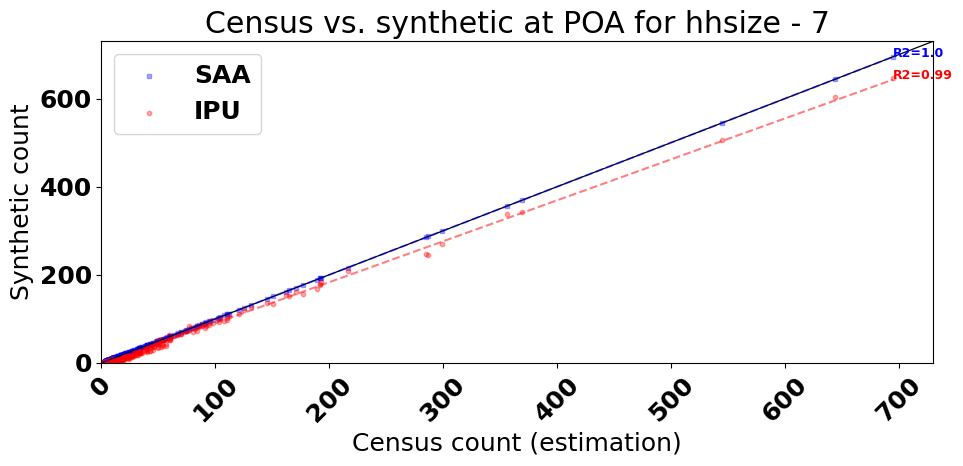

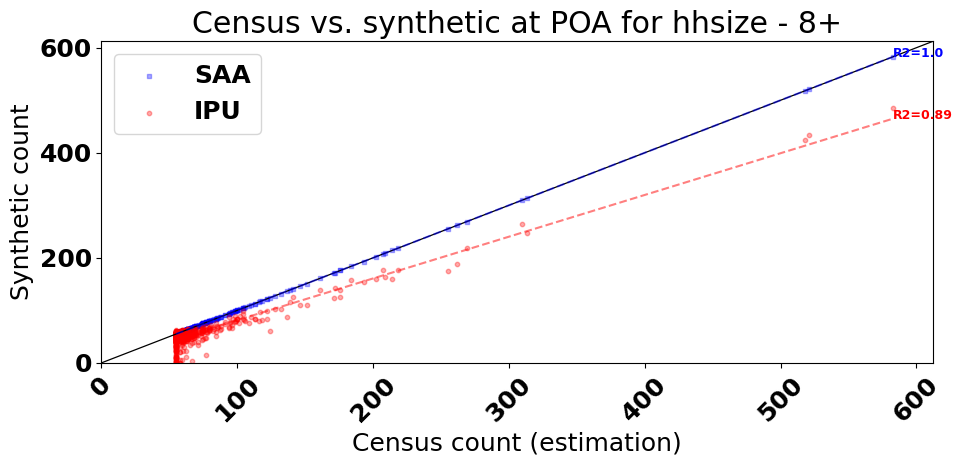

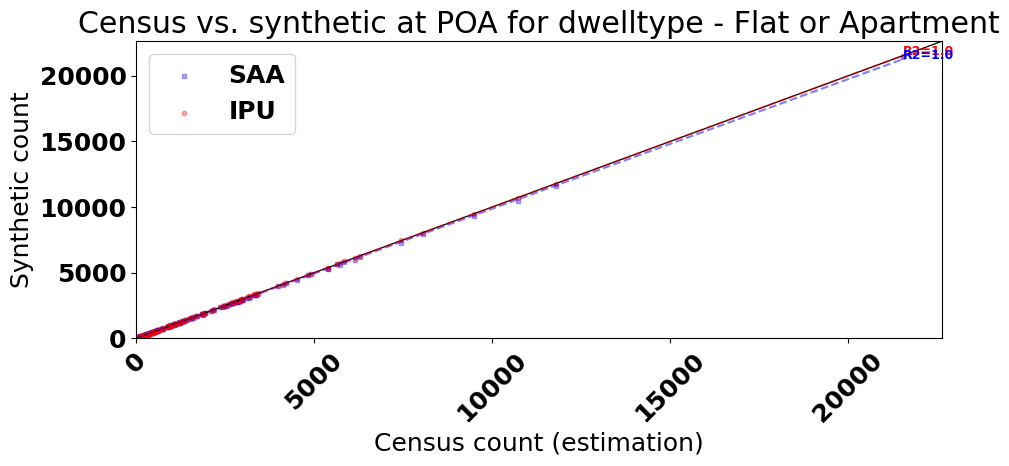

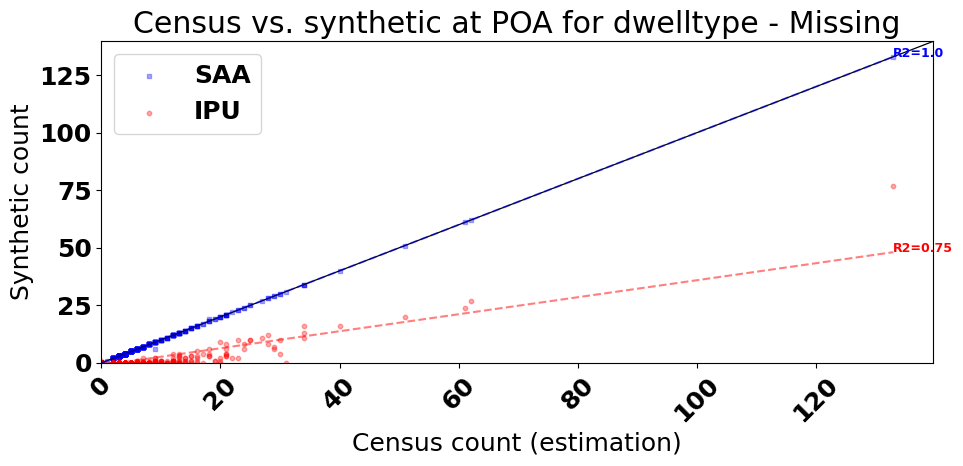

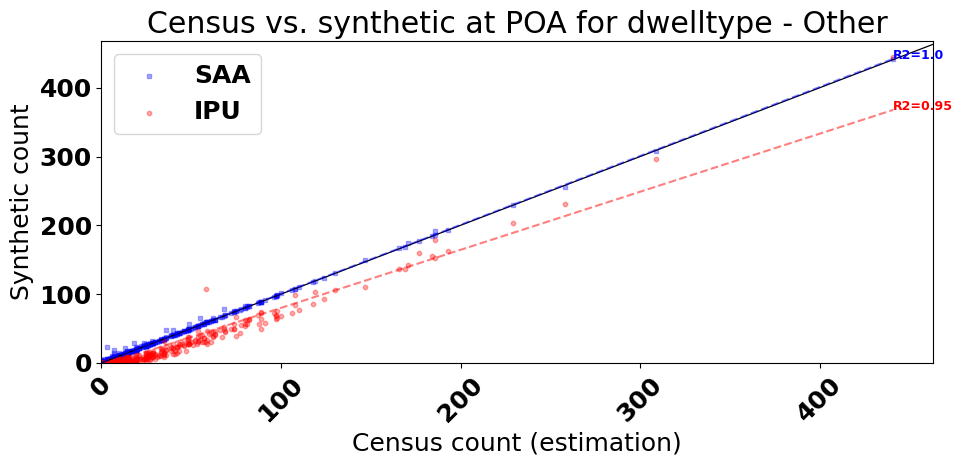

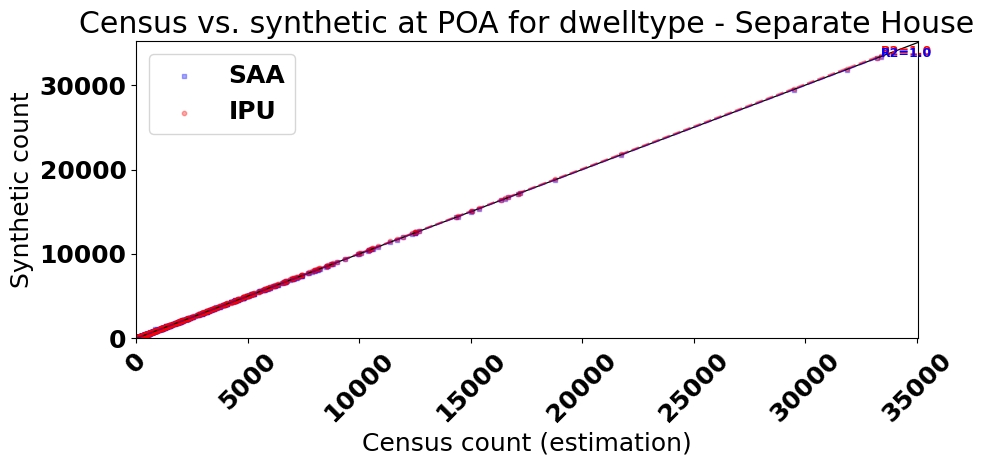

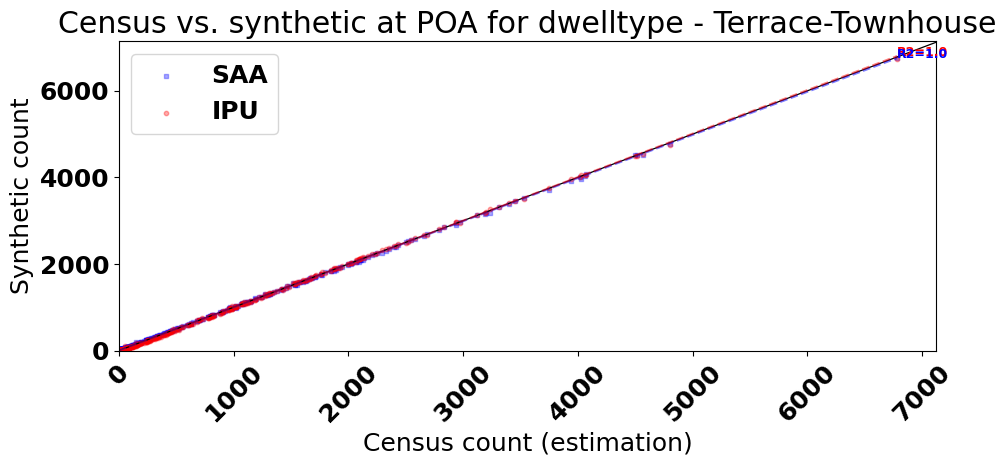

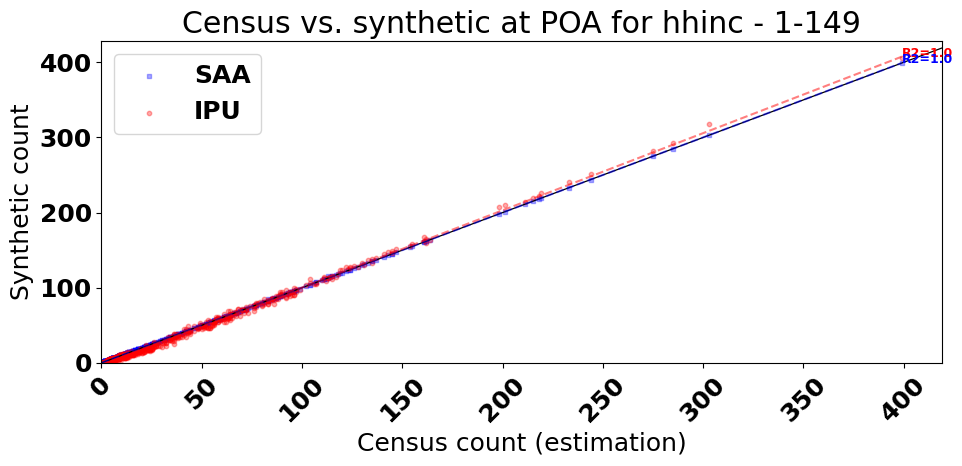

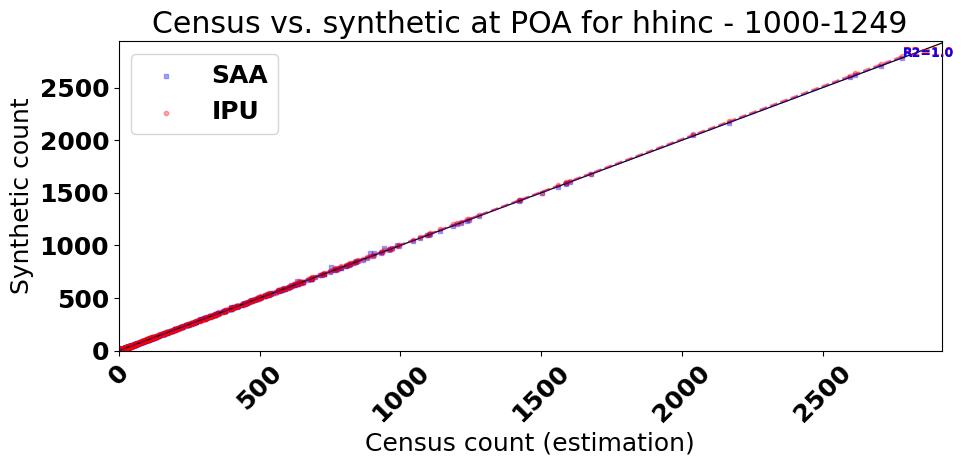

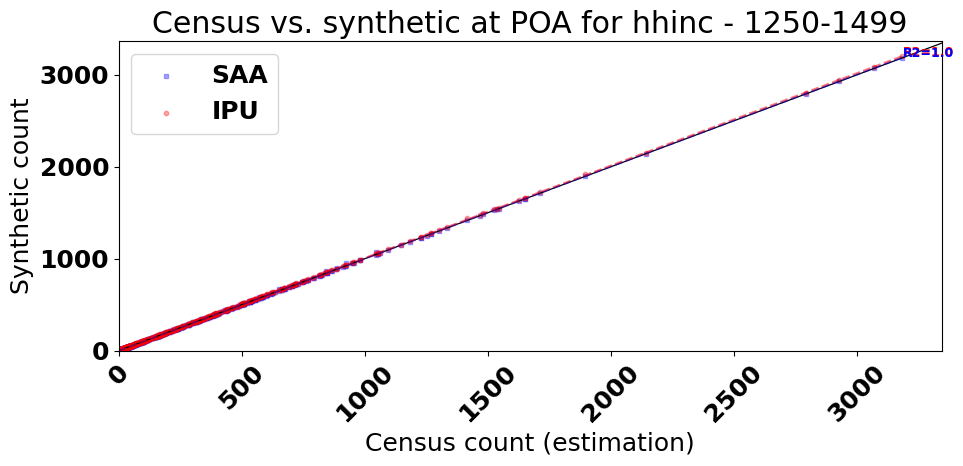

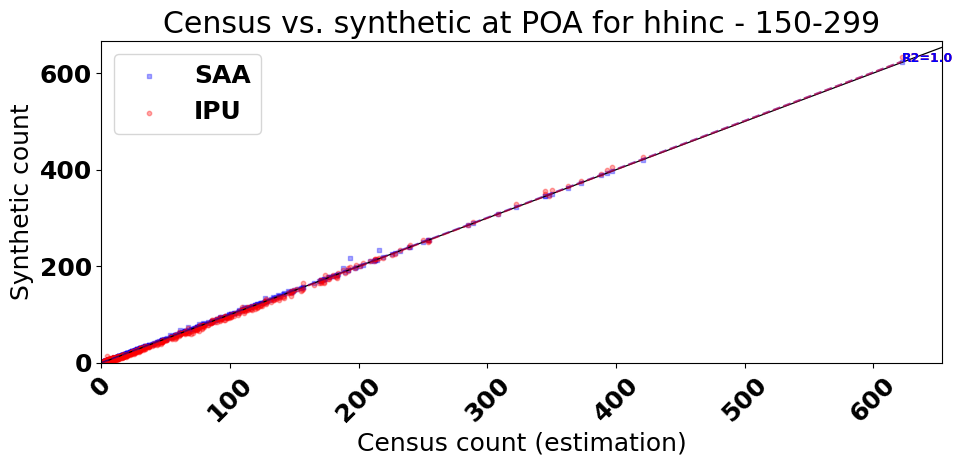

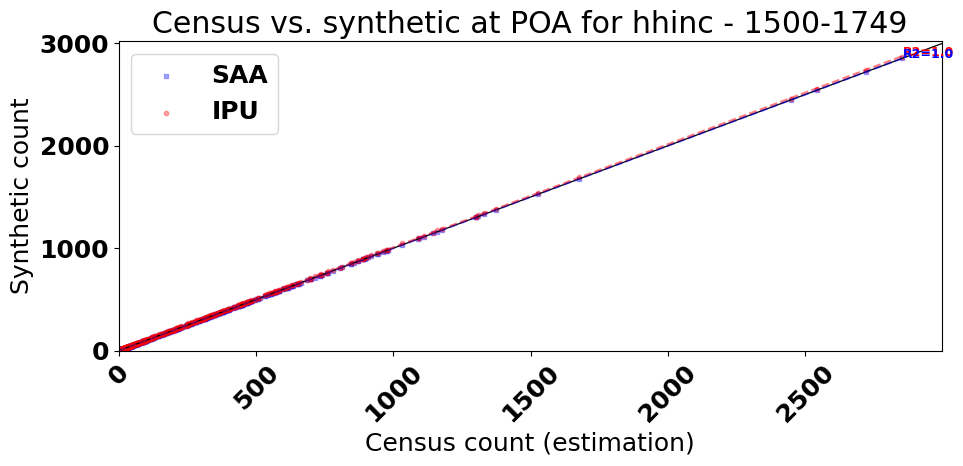

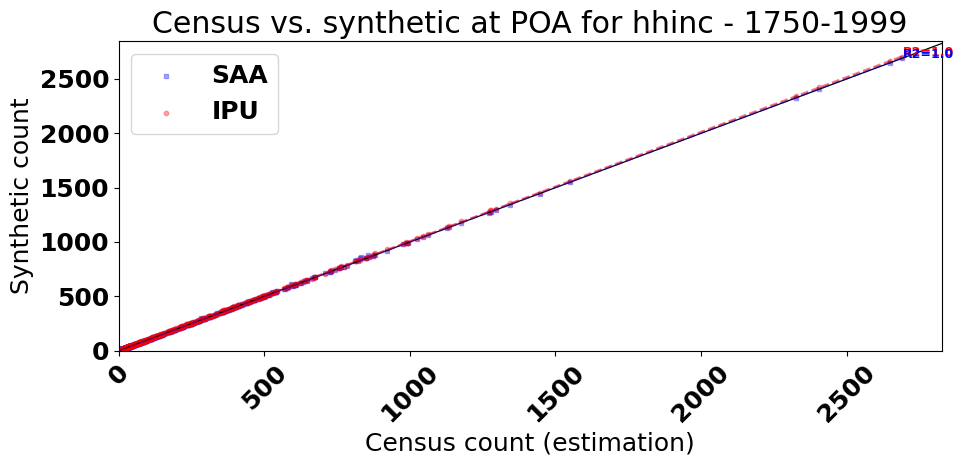

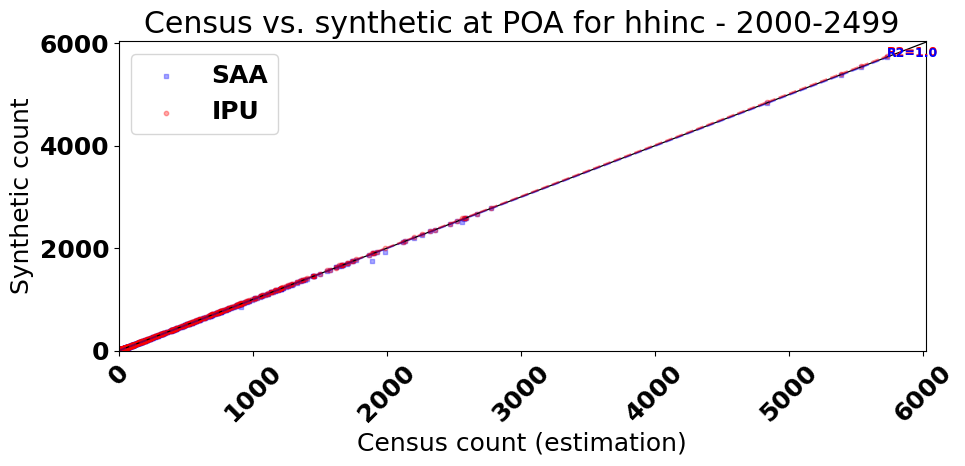

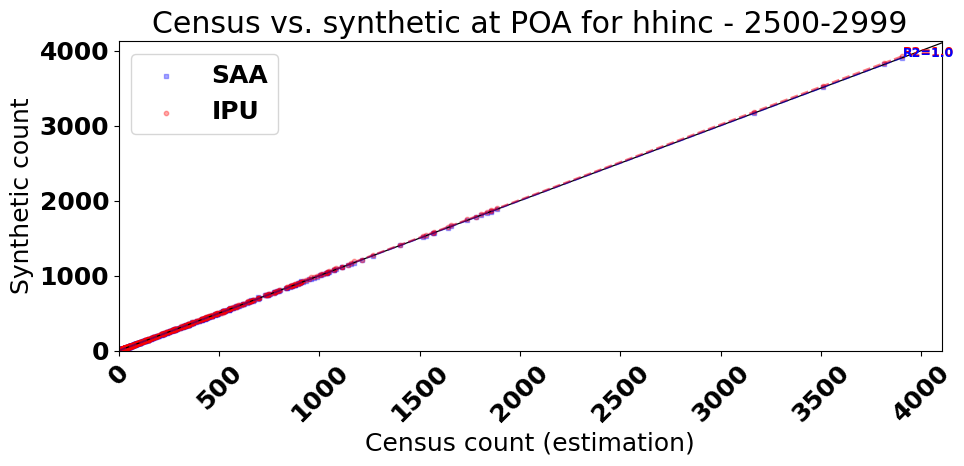

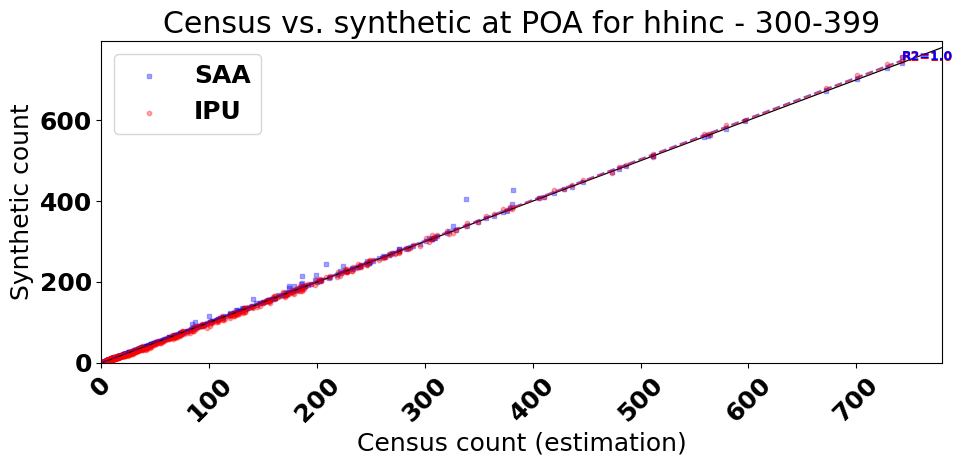

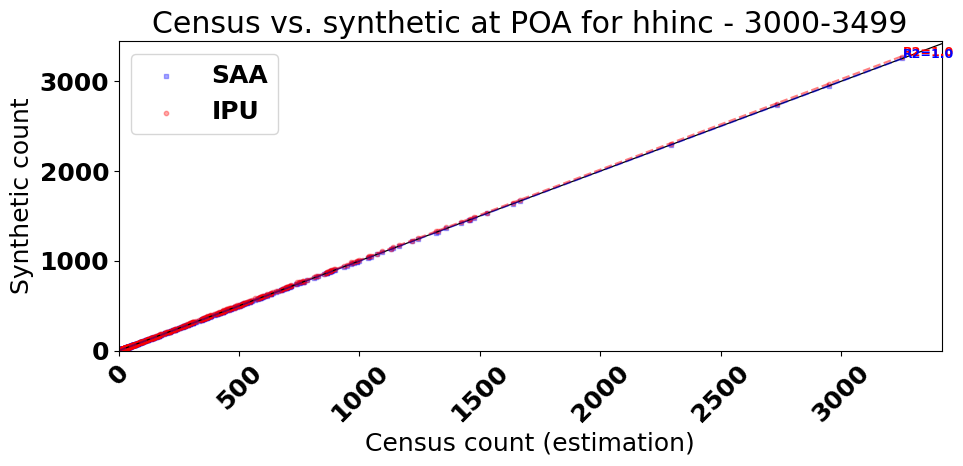

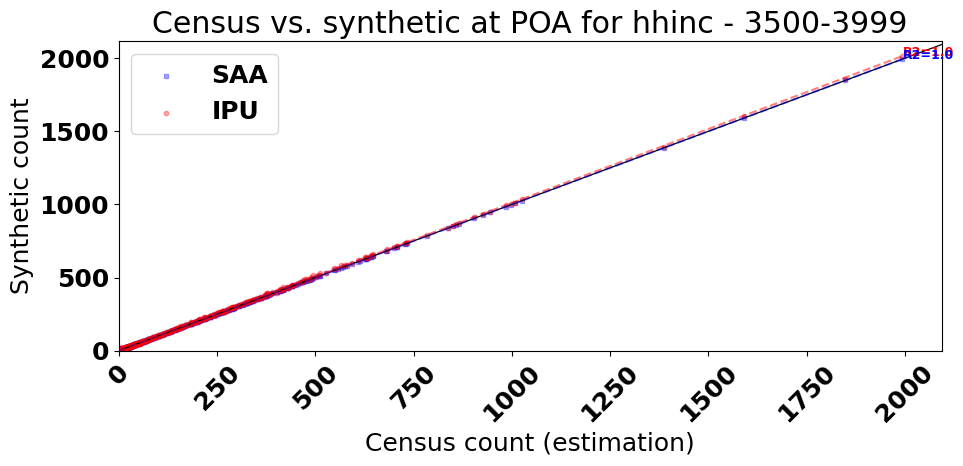

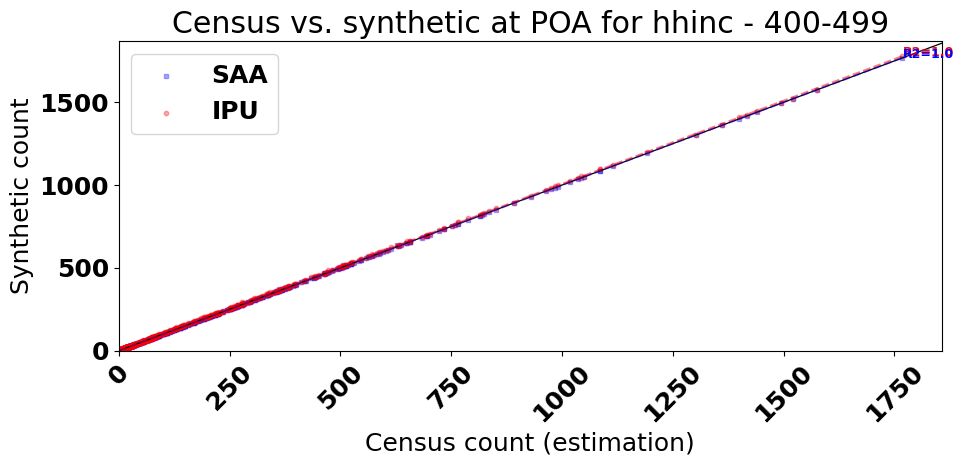

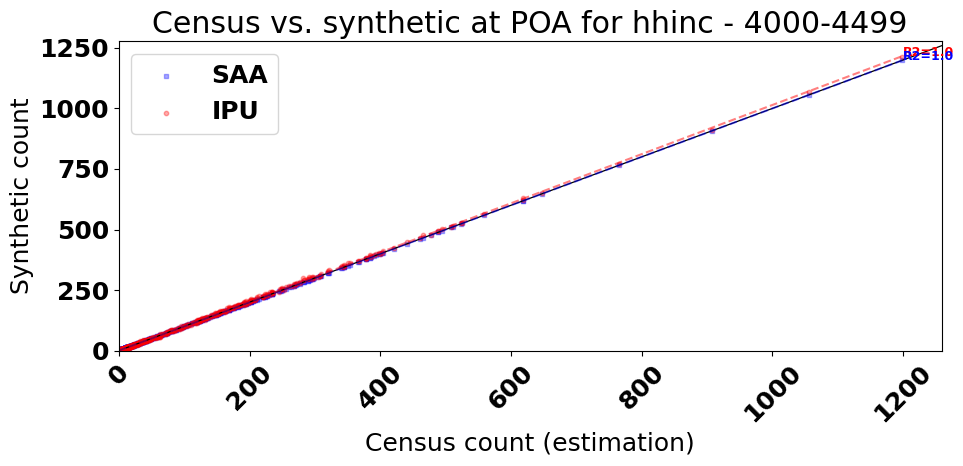

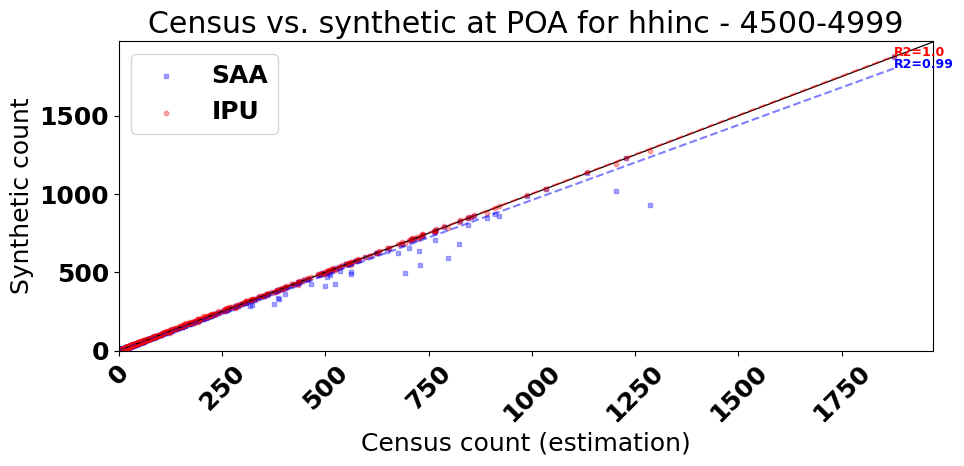

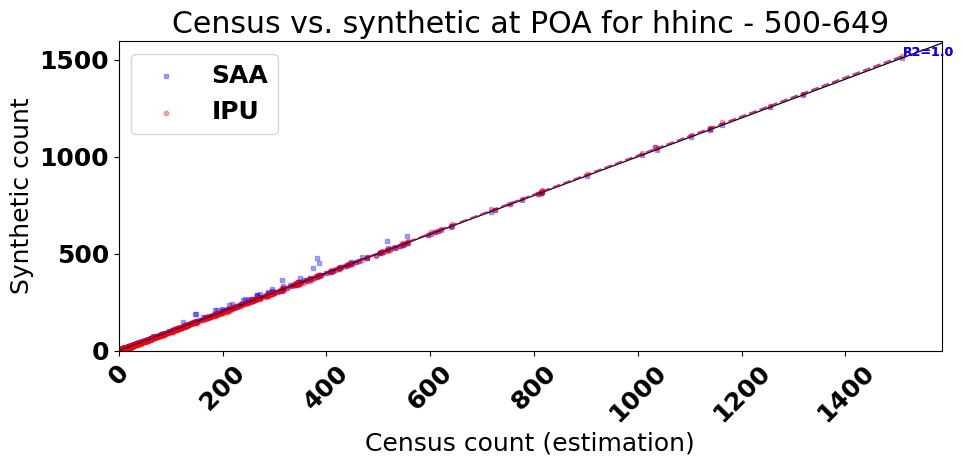

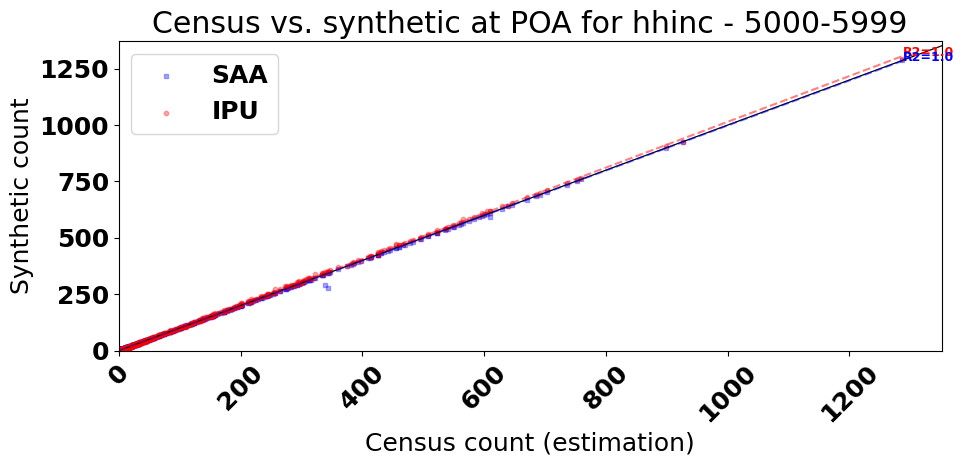

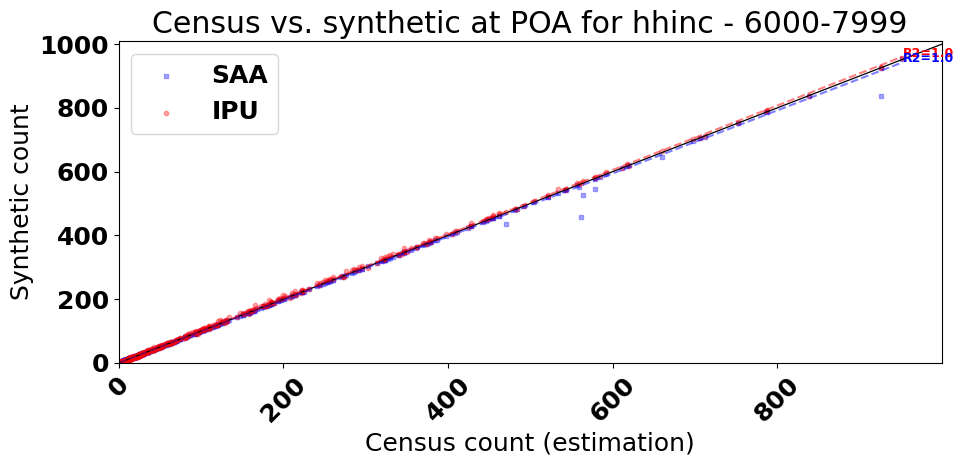

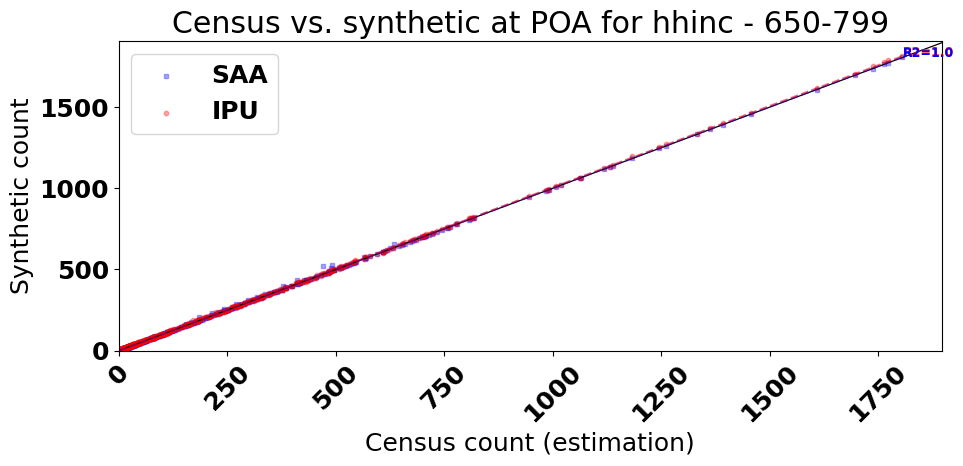

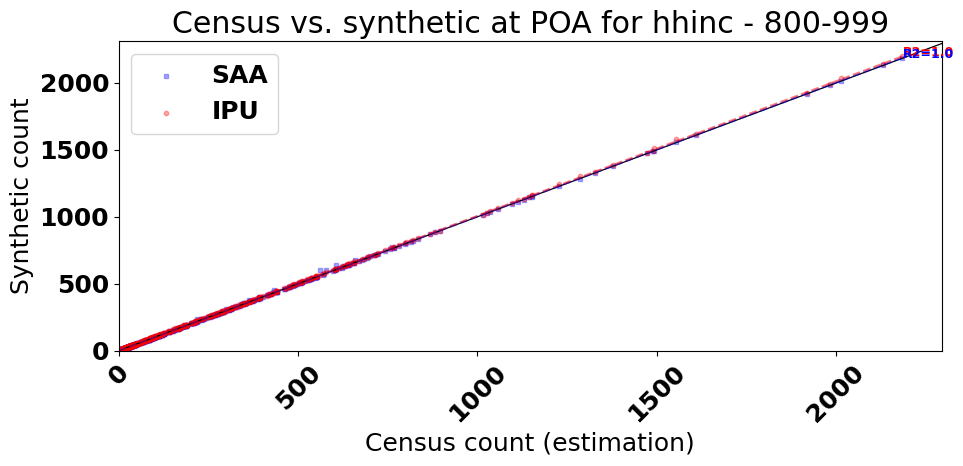

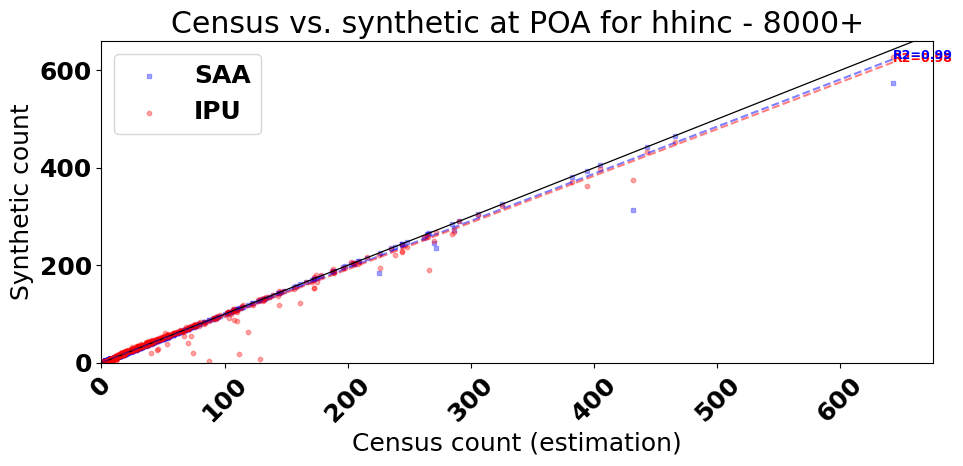

C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_1456\1836707500.py:17: RuntimeWarning: invalid value encountered in scalar divide
  results['determination'] = ssreg / sstot


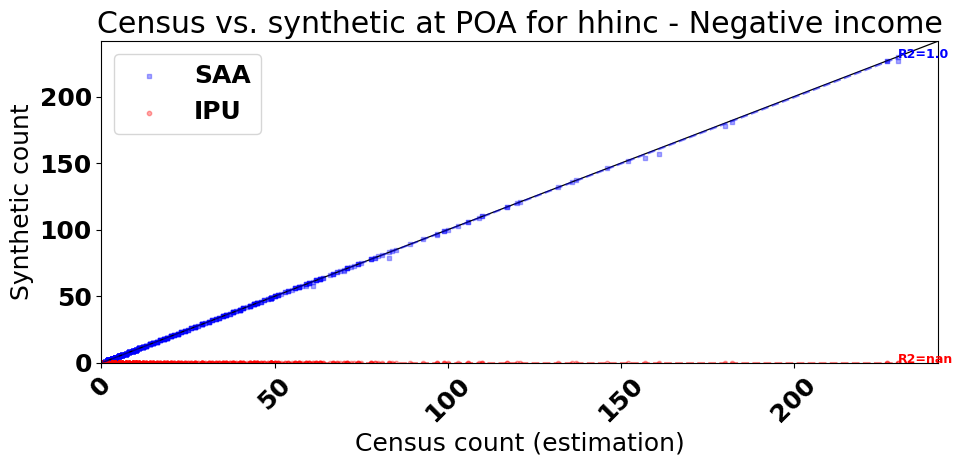

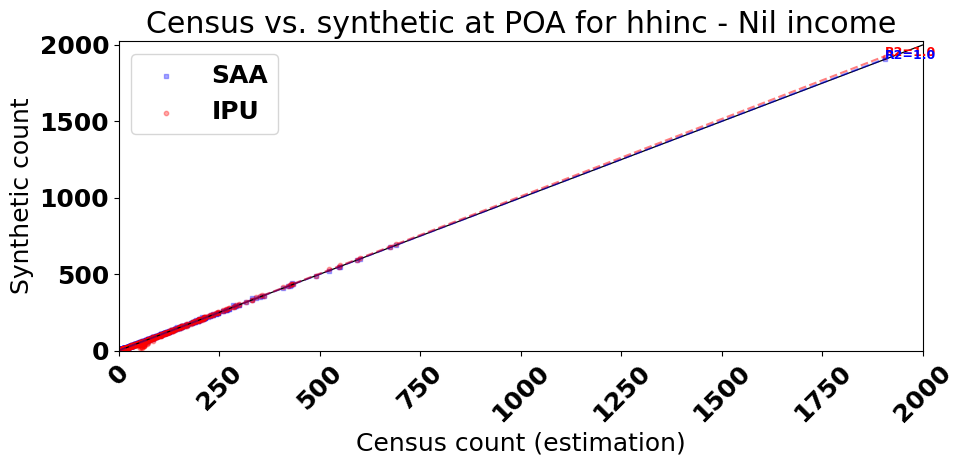

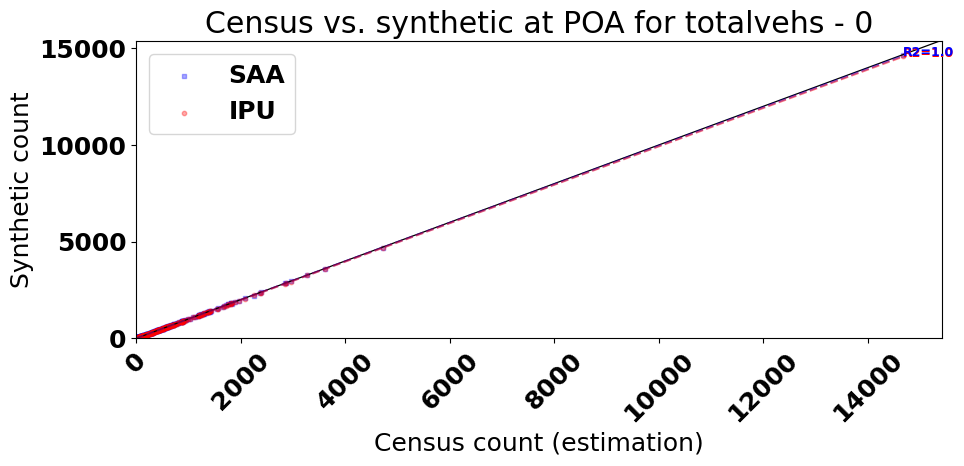

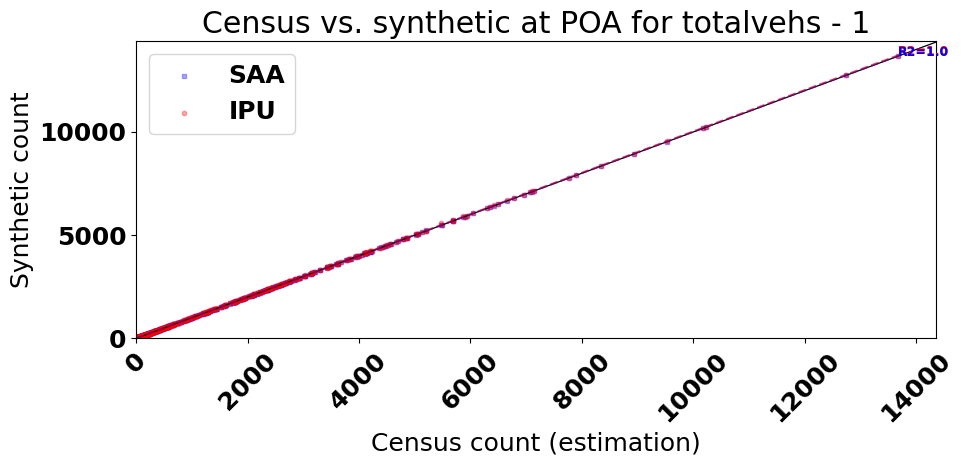

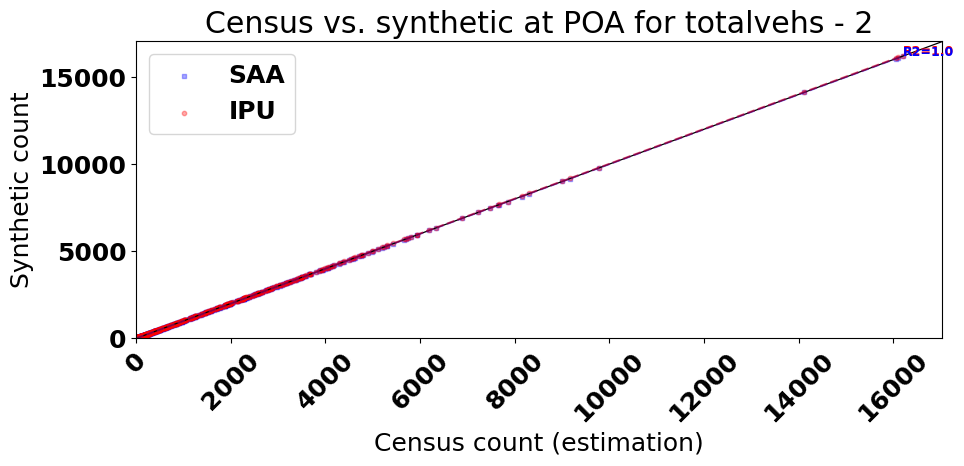

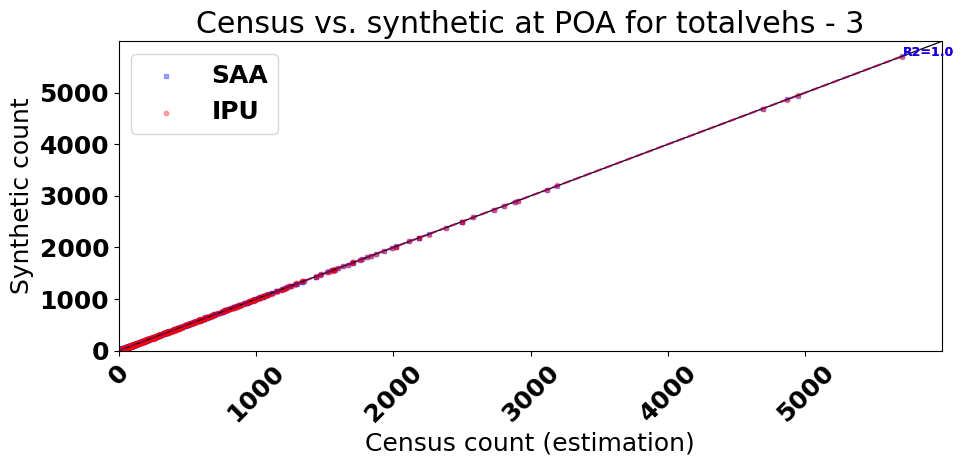

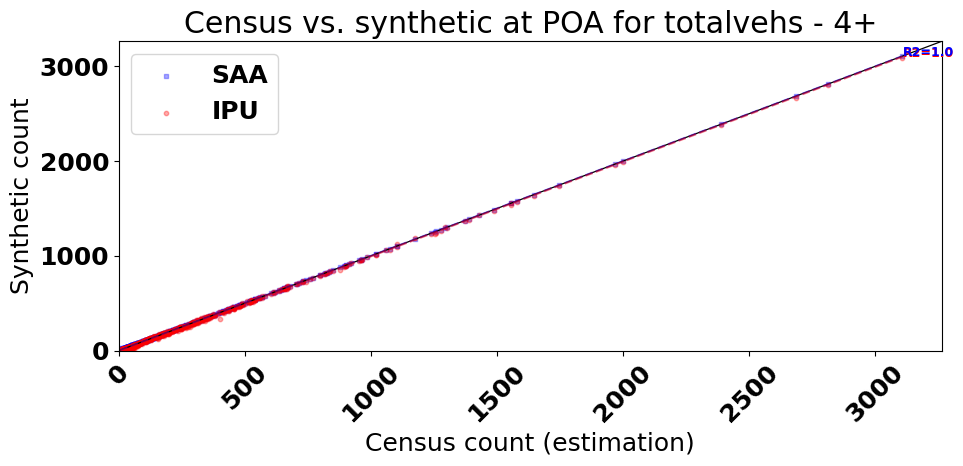

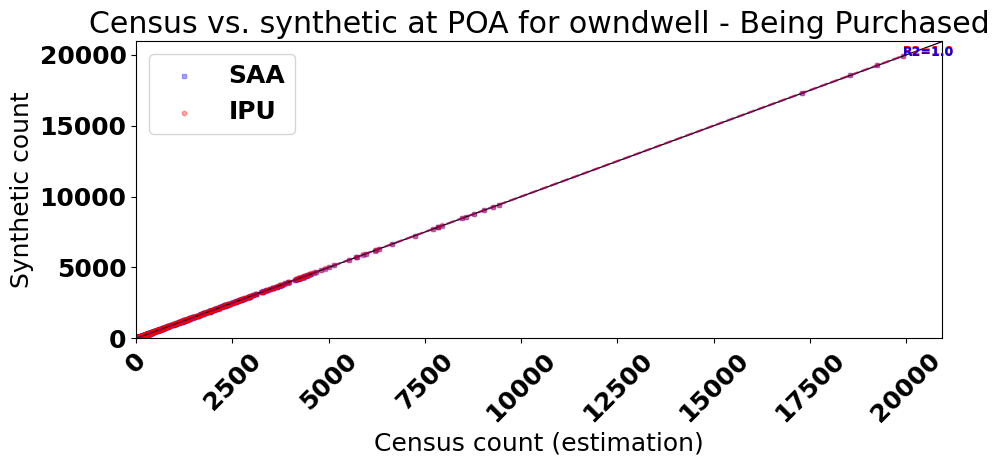

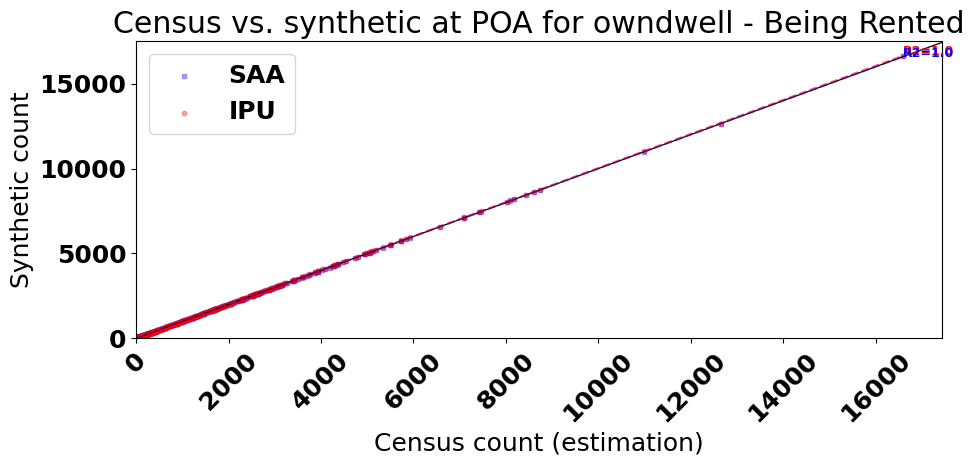

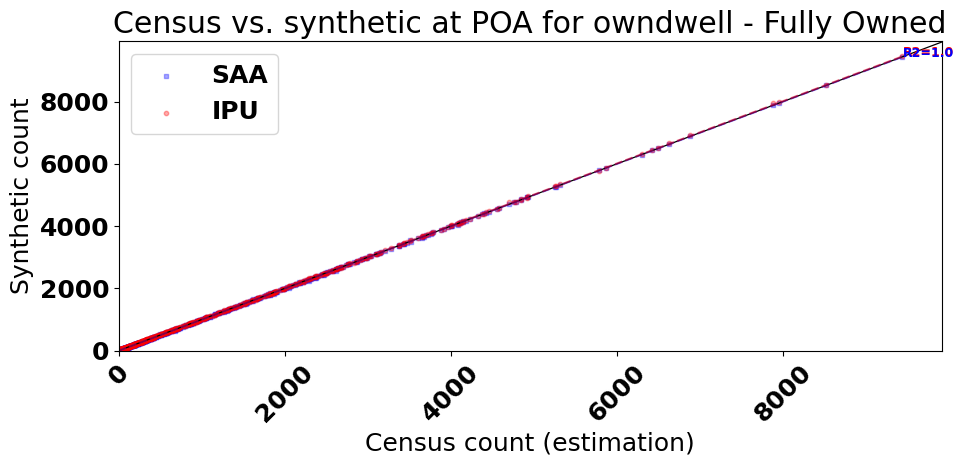

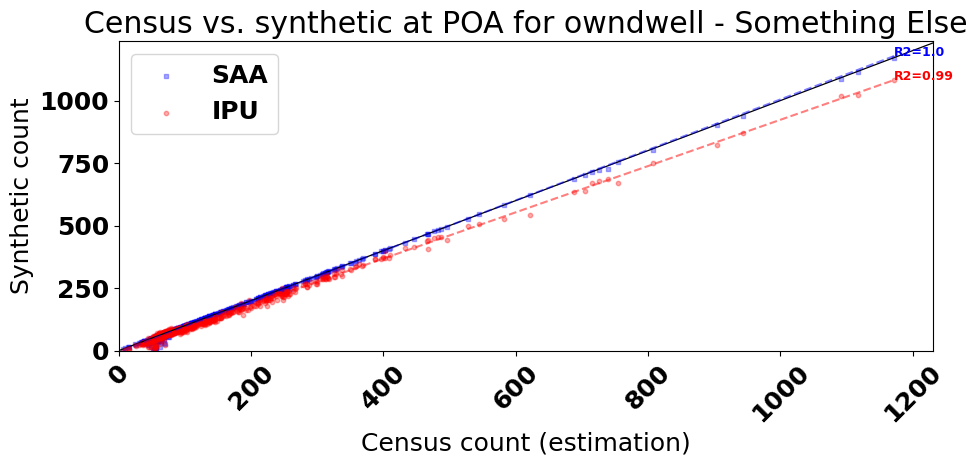

In [17]:
ls_atts = marg_hh.columns.get_level_values(0).unique()
for chosen_att in ls_atts:
    syn_check_saa = syn_hh_saa.groupby(chosen_att)[geo_lev].value_counts()
    syn_check_ipu = syn_hh_ipu.groupby(chosen_att)[geo_lev].value_counts()
    att_df = marg_hh[marg_hh.columns[marg_hh.columns.get_level_values(0)==chosen_att]]
    att_df.index = att_df.index.astype(str)

    to_plot = {}
    for val in att_df.columns.get_level_values(1).unique():
        to_plot[val] = [[], [], []]
        for poa in att_df.index:
            to_plot[val][0].append(att_df.loc[poa][(chosen_att ,val)])
            if (val, poa) in syn_check_ipu.index:
                to_plot[val][1].append(syn_check_ipu[(val, poa)])
            else:
                to_plot[val][1].append(0)
                
            if (val, poa) in syn_check_saa.index:
                to_plot[val][2].append(syn_check_saa[(val, poa)])
            else:
                to_plot[val][2].append(0)


    for val in att_df.columns.get_level_values(1):
        x = list(to_plot[val][0]),
        y_ipu = list(to_plot[val][1])
        y_saa = list(to_plot[val][2])

        fig = plt.figure(figsize = (10, 5))
        ax1 = fig.add_subplot(111)
        ax1.axline((0, 0), slope=1, c="black", linewidth=0.9)

        # Scatter data
        ax1.scatter(x, y_saa, s=10, c='b', marker="s", label='SAA', alpha=0.33)
        ax1.scatter(x, y_ipu, s=10, c='r', marker="o", label='IPU', alpha=0.33)

        #add line of best fit to plot
        y_best_fit_ipu = np.poly1d(np.polyfit(x[0], y_ipu, 1))(np.unique(x[0]))
        y_best_fit_saa = np.poly1d(np.polyfit(x[0], y_saa, 1))(np.unique(x[0]))
        ax1.plot(np.unique(x[0]), y_best_fit_saa, c='b', alpha=0.5, linestyle="--")
        ax1.plot(np.unique(x[0]), y_best_fit_ipu, c='r', alpha=0.5, linestyle="--")

        # Cal R squared
        r_s_ipu = r_squared(x[0], y_ipu, 1)["determination"]
        r_s_saa = r_squared(x[0], y_saa, 1)["determination"]

        ax1.text(max(x[0]), max(y_best_fit_ipu), f"R2={round(r_s_ipu, 2)}", size=9, c="r")
        ax1.text(max(x[0]), max(y_best_fit_saa), f"R2={round(r_s_saa, 2)}", size=9, c="b")
        
        plt.xlabel(f"Census count (estimation)")
        plt.ylabel("Synthetic count")
        val = val.replace("/", "-")
        plt.title(f"Census vs. synthetic at {geo_lev} for {chosen_att} - {val}")
        ax1.set_xlim(left=0)
        ax1.set_ylim(bottom=0)
        plt.xticks(rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()
        # plt.savefig(f'./output/imgs/{chosen_att}_{val}_census_compa.png')

In [20]:
data_dir

'C:\\Users\\dlaa0001\\Documents\\PhD\\PopSyn_Monash\\PopSynthesis\\Methods\\connect_HH_PP\\data'

In [24]:
poa_geo = gpd.read_file(r"C:\Users\dlaa0001\Documents\PhD\PopSyn_Monash\PopSynthesis\Methods\IPSF\data\raw\POA_2021_AUST_GDA2020_SHP.zip", columns=["POA_CODE21"], engine="pyogrio")
poa_geo[geo_lev] = poa_geo["POA_CODE21"].astype(str)
poa_geo = poa_geo.set_index(geo_lev).drop(columns=["POA_CODE21"])

ls_metro_mel_raw = [
    (3000, 3211),
    (3335, 3336),
    (3338, 3338),
    (3427, 3429),
    (3750, 3752),
    (3754, 3755),
    (3759, 3761),
    (3765, 3775),
    (3781, 3787),
    (3788, 3815),
    (3910, 3920),
    (3926, 3944),
    (3975, 3978),
    (3980, 3980)
]
ls_metro_poa_all = []
for pair_range in ls_metro_mel_raw:
    ls_metro_poa_all += list(range(pair_range[0], pair_range[1]+1))
ls_metro_poa_all = [str(x) for x in ls_metro_poa_all]

In [25]:
def wrapper_produce_all_results(ls_syn_pop_name, benchmark_marg, geo_lev, geo_file, ls_sub_zones=None, to_plot=False, all_name=""):
    ls_atts = list(benchmark_marg.columns.get_level_values(0).unique())
    benchmark_marg.index = benchmark_marg.index.astype(str)

    ls_series_zones = []
    ls_series_atts = []
    ls_series_states = []
    ls_names = []
    for syn_pop, name in ls_syn_pop_name:
        ls_names.append(name)
        converted_m = convert_full_to_marg_count(syn_pop, geo_lev, [x for x in syn_pop if x not in ls_atts])
        diff_se_m = (converted_m - benchmark_marg)**2
        # diff_se_m = diff_se_m.fillna(1000000)
        # Drop the special case of negative income
        if all_name == "HH":
            diff_se_m = diff_se_m.drop(columns=[("hhinc", "Negative income")])
        # Process for zones
        zones_rmse = diff_se_m.mean(axis=1).apply(lambda x: np.sqrt(x))
        zones_rmse.name = name
        ls_series_zones.append(zones_rmse)
        # Process for atts
        atts_rmse = pd.Series(name=name)
        for att in ls_atts:
            sub_diff = diff_se_m[diff_se_m.columns[diff_se_m.columns.get_level_values(0)==att]]
            # sub_diff.columns = sub_diff.columns.droplevel(0)
            sum_sub = sub_diff.mean(axis=1).apply(lambda x: np.sqrt(x))
            atts_rmse.loc[att] = sum_sub.mean()
        ls_series_atts.append(atts_rmse)
        # Process for states
        states_rmse = diff_se_m.mean()
        states_rmse.name = name
        ls_series_states.append(states_rmse)
    fin_zones_df = pd.concat(ls_series_zones, axis=1)
    # Process for final score
    fin_rmse = fin_zones_df.mean()
    # Process to have geo info
    fin_zones_gdf = geo_file.merge(fin_zones_df, left_index=True, right_index=True)
    # Process for fin atts score
    fin_atts_df = pd.concat(ls_series_atts, axis=1)
    # Process for fin states score
    fin_states_df = pd.concat(ls_series_states, axis=1)
    if ls_sub_zones is None:
        fin_sub_zones = None
    else:
        fin_sub_zones = fin_zones_gdf[fin_zones_gdf.index.isin(ls_sub_zones)]
    
    if to_plot:
        if all_name == "HH":
            vmax = 50
        else:
            vmax = 10000
        for method in ls_names:
            ax_all = fin_zones_gdf.plot(column=method, legend=True, figsize=(20, 12), vmin=0, vmax=vmax, cmap="plasma")
            ax_all.set_title(f"All_VIC - {geo_lev} - {all_name}_RMSE_{method}")
            plt.savefig(f'./output/imgs/{all_name}_All_{geo_lev}_{method}_RMSE.png',bbox_inches='tight')
            if fin_sub_zones is not None:
                ax_sub = fin_sub_zones.plot(column=method, legend=True, figsize=(20, 12), vmin=0, vmax=vmax, cmap="plasma")
                ax_sub.set_title(f"Metro_VIC - {all_name}_RMSE_{method}")
                plt.savefig(f'./output/imgs/{all_name}_Metro_{geo_lev}_{method}_RMSE.png',bbox_inches='tight')
    return fin_zones_gdf, fin_sub_zones, fin_rmse, fin_atts_df, fin_states_df

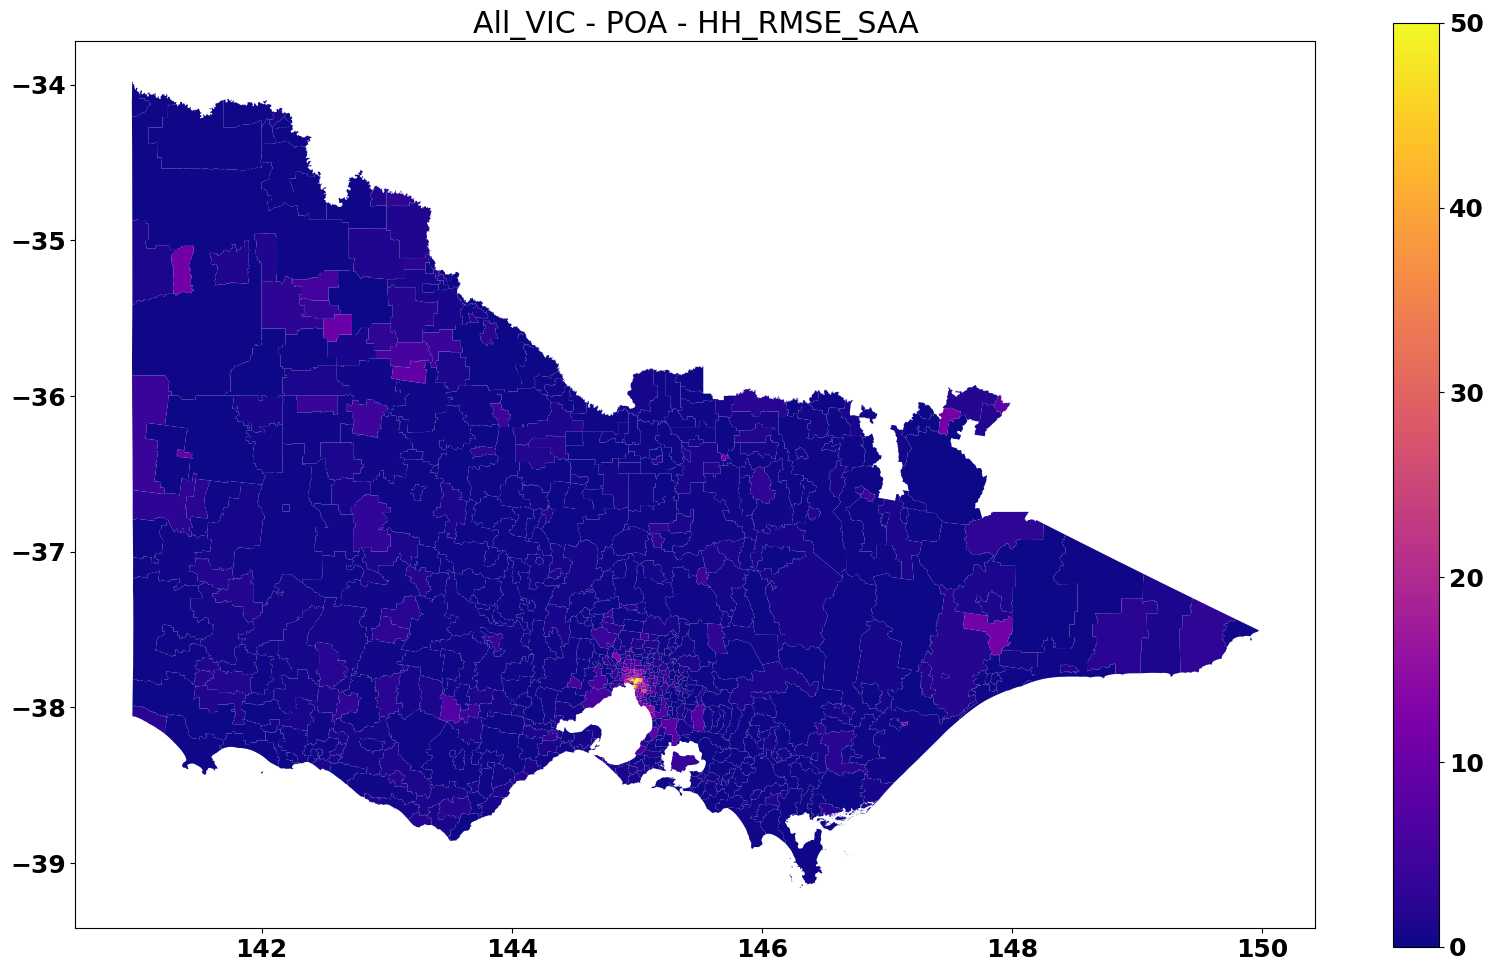

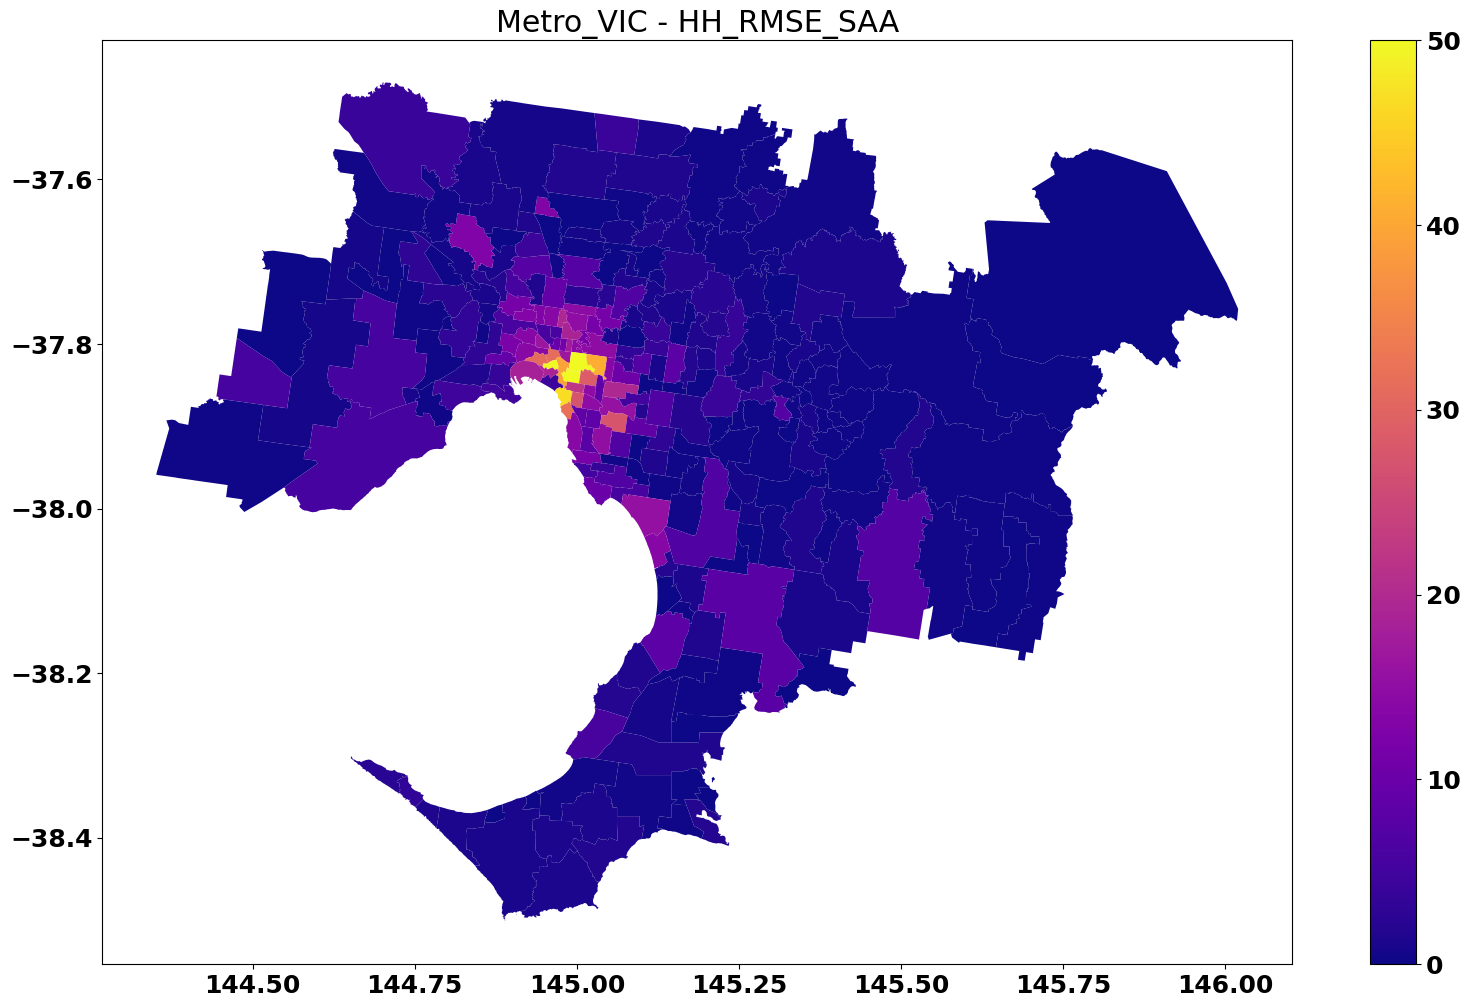

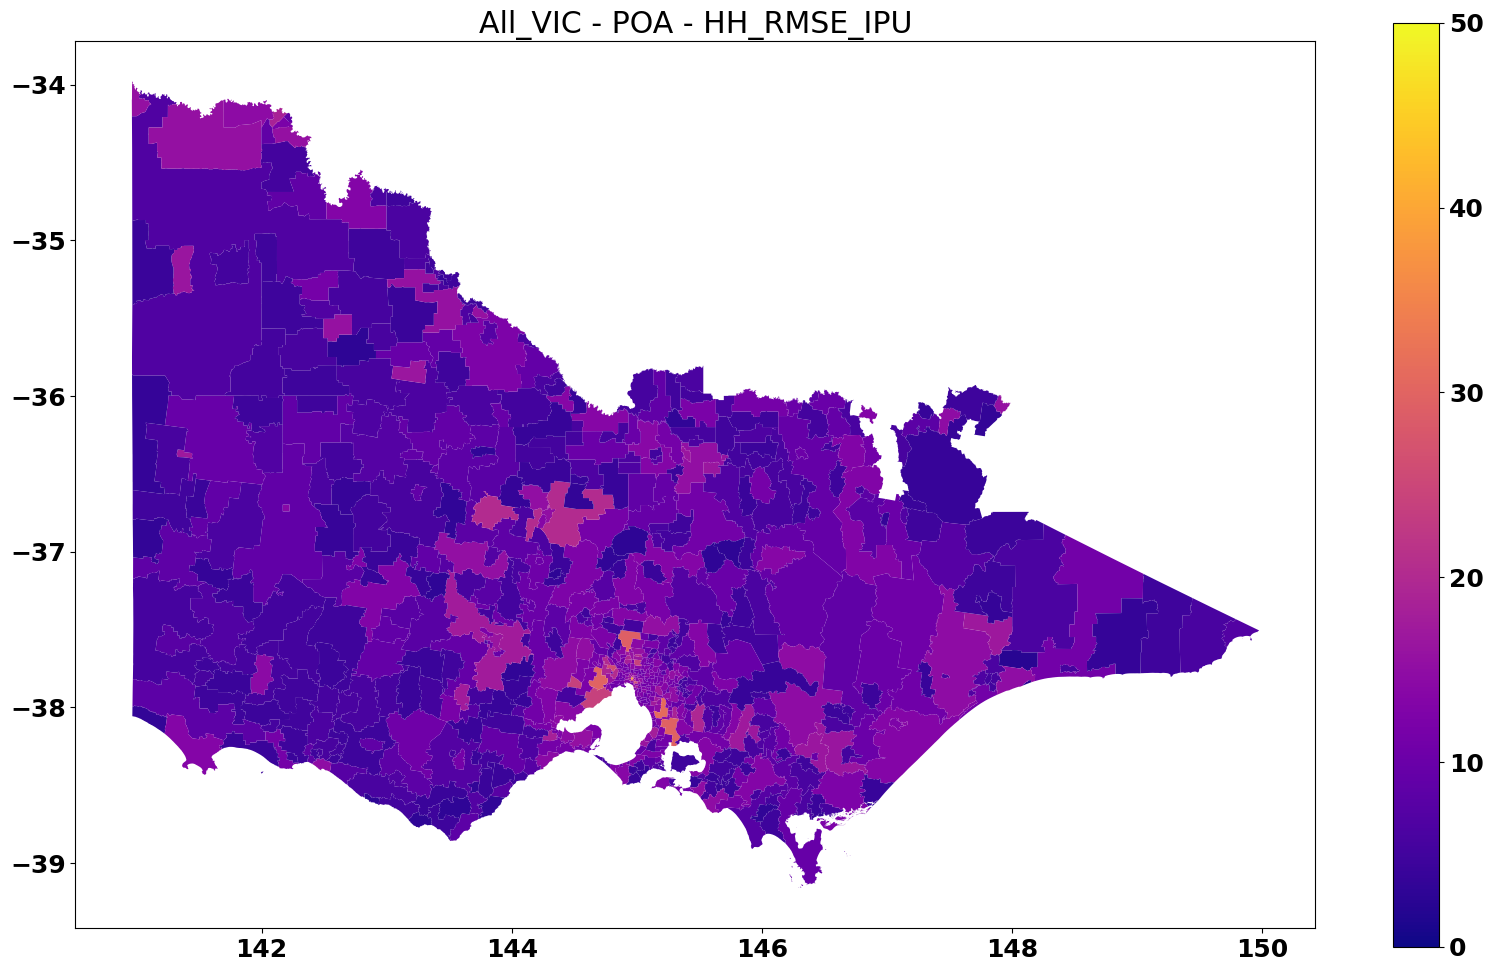

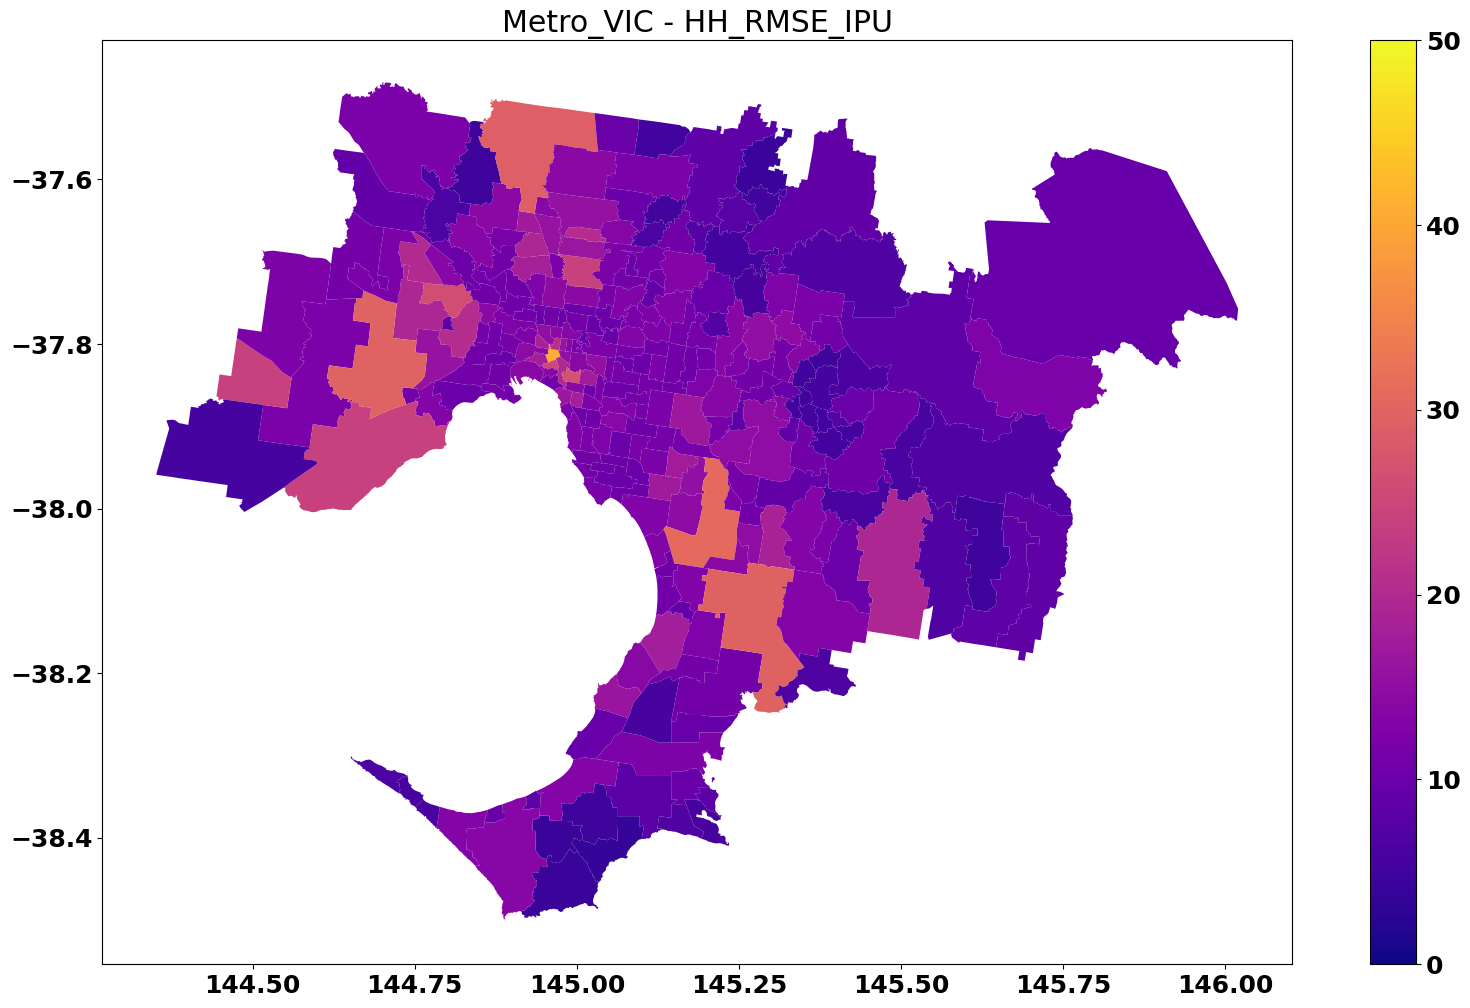

In [26]:
ls_syn_pop_hh = [
    (syn_hh_saa, "SAA"),
    (syn_hh_ipu, "IPU"),
]
hh_zones_gdf, hh_sub_zones, hh_rmse, hh_atts_df, hh_states_df = wrapper_produce_all_results(ls_syn_pop_hh, marg_hh, "POA", poa_geo, ls_sub_zones=ls_metro_poa_all, to_plot=True, all_name="HH")

In [28]:
hh_atts_df["SAA_to_IPU"] = (hh_atts_df["SAA"] - hh_atts_df["IPU"])/hh_atts_df["IPU"]
hh_states_df["SAA_to_IPU"] = (hh_states_df["SAA"] - hh_states_df["IPU"])/hh_states_df["IPU"]

In [31]:
hh_states_df

SAA          IPU  SAA_to_IPU
dwelltype Flat or Apartment  516.772793   165.205499    2.128060
          Missing              0.014472    48.615051   -0.999702
          Other                2.464544   143.219971   -0.982792
          Separate House     432.014472  1346.790159   -0.679227
          Terrace/Townhouse   76.945007   330.068017   -0.766881
hhinc     1-149                0.020260    10.125904   -0.997999
          1000-1249            9.422576    18.215630   -0.482720
          1250-1499            5.655572    23.386397   -0.758168
          150-299              1.910275     9.052098   -0.788969
          1500-1749            0.088278    22.127352   -0.996010
          1750-1999            6.241679    17.820550   -0.649748
          2000-2499           39.419682    35.557164    0.108628
          2500-2999            4.617945    20.467438   -0.774376
          300-399             17.217077     9.591896    0.794961
          3000-3499            0.173661    25.107091   -0.993083
          3500-3999            0.095514    18.065123   -0.994713
          400-499              0.742402    16.072359   -0.953809
          4000-4499            0.260492    10.901592   -0.976105
          4500-4999          524.972504    14.063676   36.328257
          500-649             48.544139    10.646889    3.559467
          5000-5999            9.833575    14.277858   -0.311271
          6000-7999           32.947902    10.204052    2.228904
          650-799             11.554269    14.247467   -0.189030
          800-999              8.959479    17.661360   -0.492707
          8000+               32.830680    88.570188   -0.629326
          Nil income           5.208394    27.685962   -0.811876
hhsize    1                    0.000000    89.793054   -1.000000
          2                    0.000000   222.010130   -1.000000
          3                    0.000000    64.279305   -1.000000
          4                    0.000000    55.052098   -1.000000
          5                    0.000000    28.134588   -1.000000
          6                    0.000000    51.379161   -1.000000
          7                    0.000000    48.263386   -1.000000
          8+                   0.000000   365.366136   -1.000000
owndwell  Being Purchased     65.345876   127.198263   -0.486268
          Being Rented        47.898698   164.811867   -0.709373
          Fully Owned         54.866860   159.606368   -0.656236
          Something Else      63.625181   347.506512   -0.816909
totalvehs 0                   26.693198   129.863965   -0.794453
          1                   25.859624   130.431259   -0.801738
          2                    4.897250   133.573082   -0.963337
          3                    1.958032    40.596237   -0.951768
          4+                   2.858177    98.968162   -0.971120

In [29]:
hh_atts_df.index.name = "att"
hh_atts_df = hh_atts_df.reset_index()
hh_atts_df["type"] = "Household"
hh_atts_df = hh_atts_df.set_index(["type","att"])
hh_atts_df

SAA        IPU  SAA_to_IPU
type      att                                       
Household hhsize     0.000000   9.228210   -1.000000
          dwelltype  4.741934  16.536974   -0.713253
          hhinc      1.214482   3.789674   -0.679529
          totalvehs  1.241289   8.884538   -0.860287
          owndwell   3.984181  12.263391   -0.675116

In [30]:
hh_rmse

SAA    2.707147
IPU    9.355981
dtype: float64